# **ADDITIONAL EDA : AIRBNB PRICE PREDICTION IN NEW YORK**

## Reading the data

In [1]:
import pandas as pd

# Load the CSV file into a dataframe
df = pd.read_csv('AB_NYC_2019.csv')

print(df.shape)
# Print the first few rows of the dataframe
df.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## EDA

In [2]:
# Convert the last_review column to datetime format
df['last_review'] = pd.to_datetime(df['last_review'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

##Correlation

In [8]:
# to get correlation/ association across the various variables
!pip install --upgrade sweetviz
import sweetviz as sv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 79.6 MB/s eta 0:00:00


In [10]:
port = sv.analyze(source = df, target_feat = 'price', feat_cfg = None, pairwise_analysis = 'auto')
#port.to_file(output_file="abc_pandas_profiling.html")
port.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



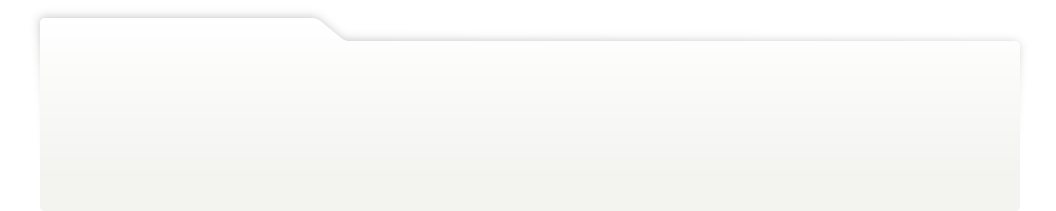
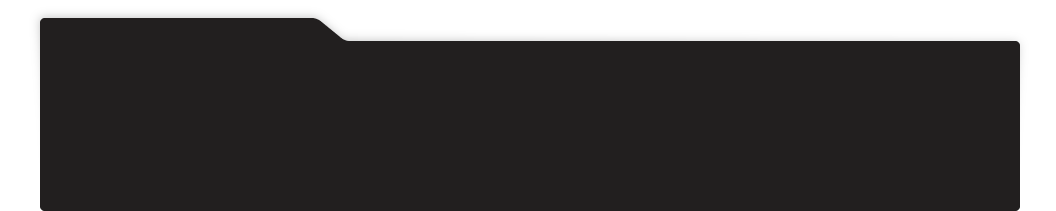
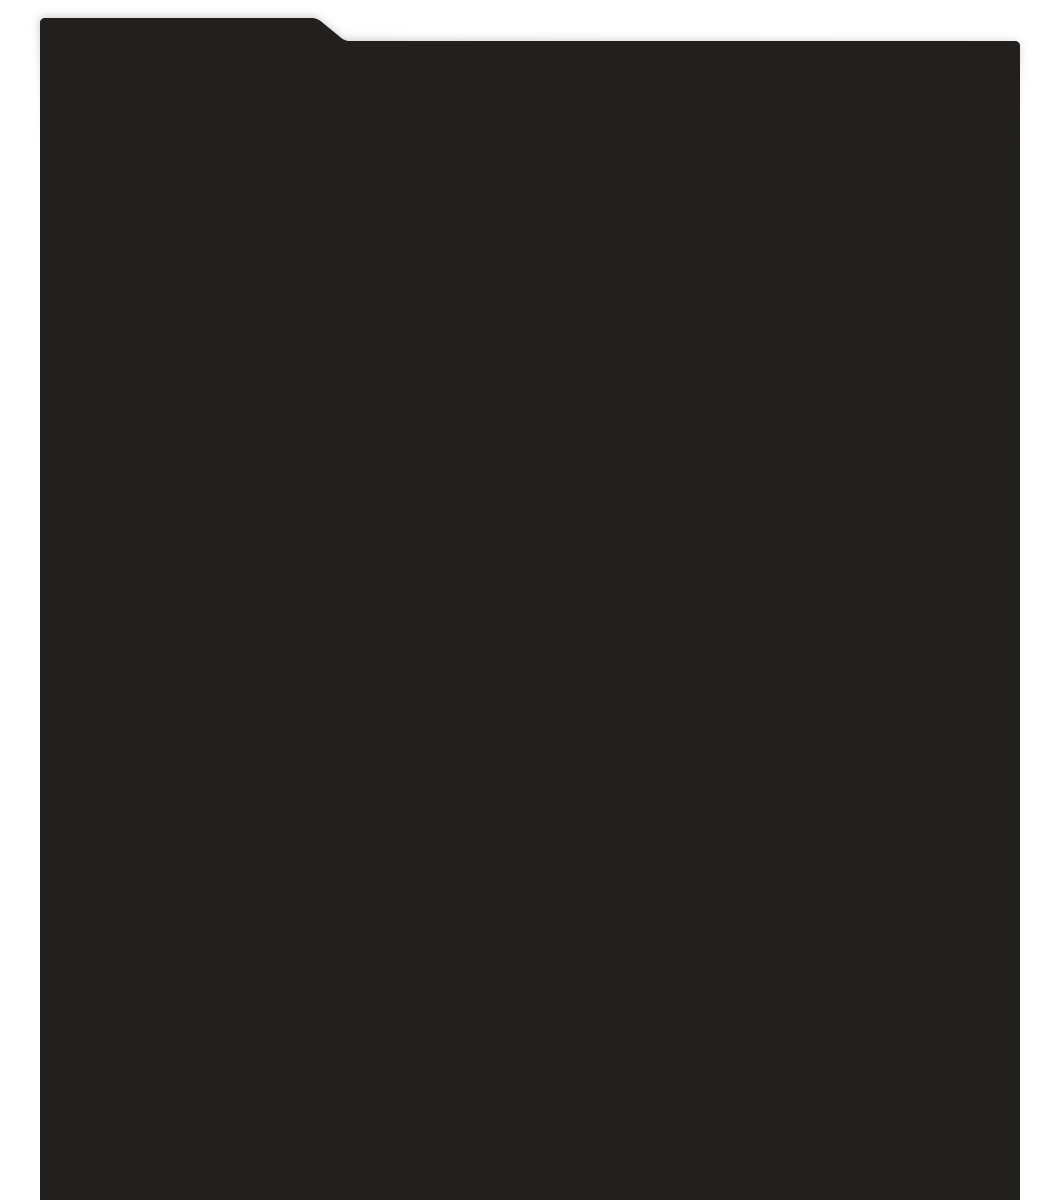
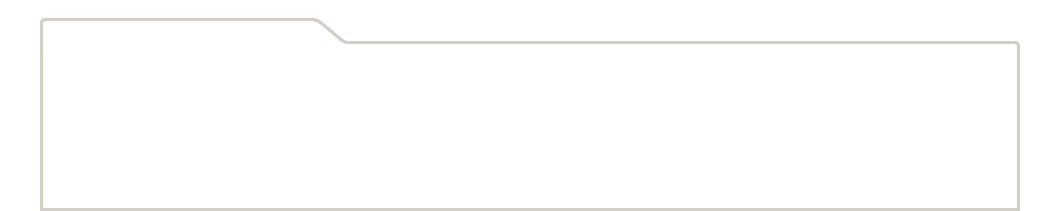
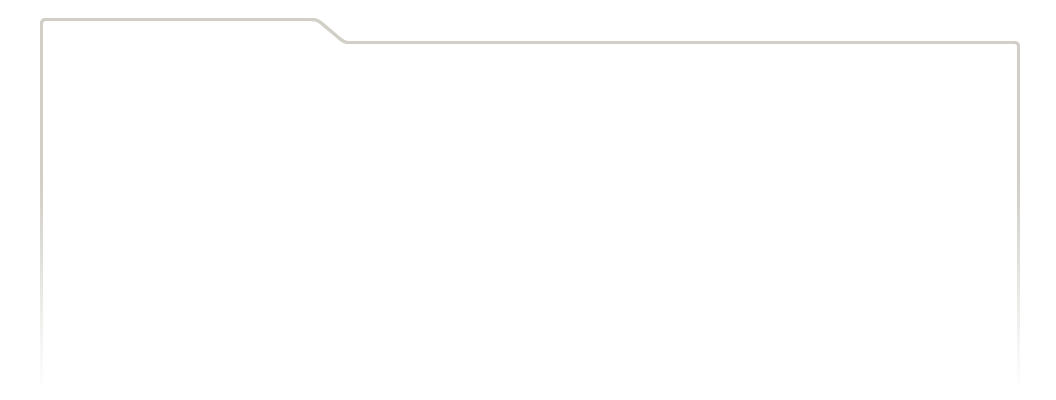
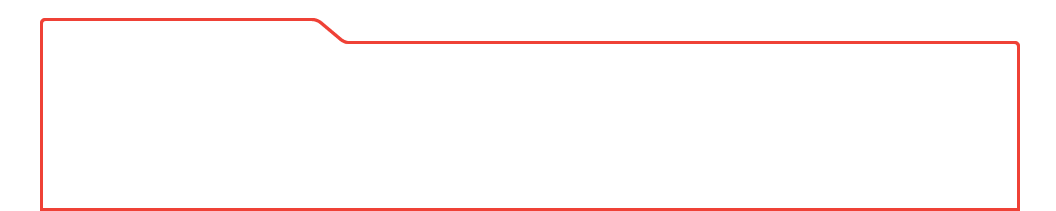
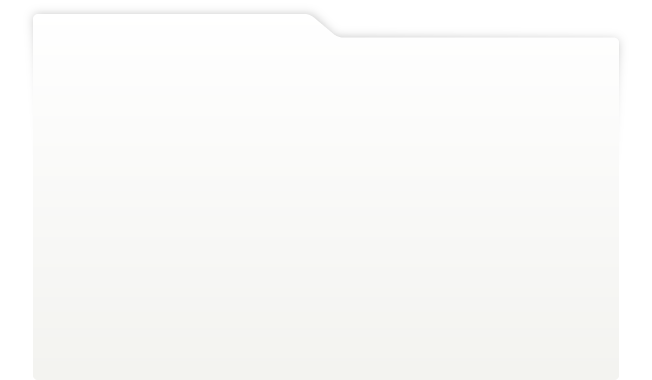
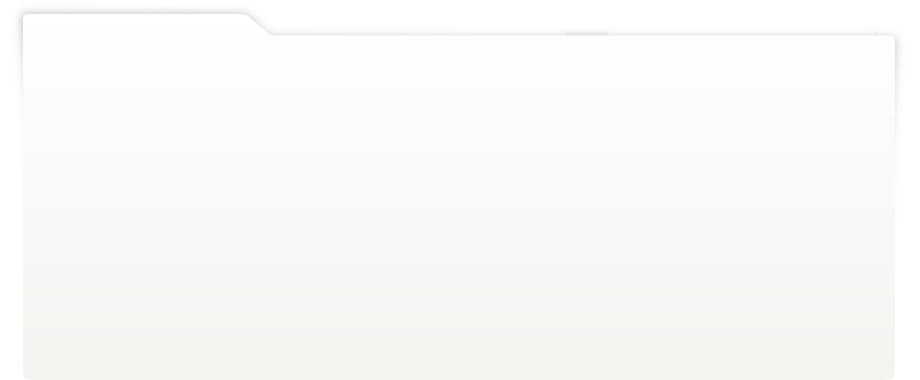
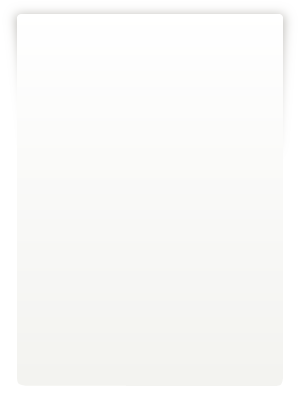
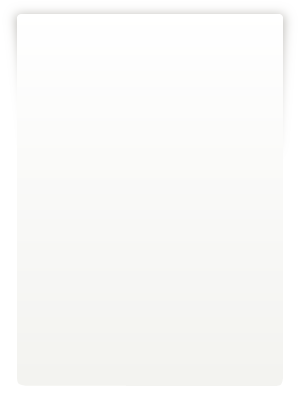
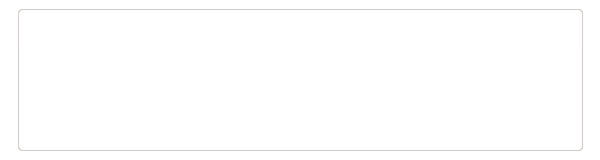
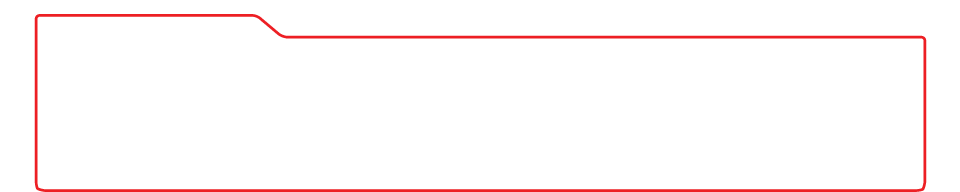
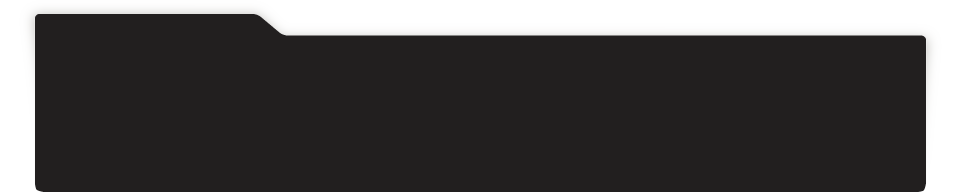
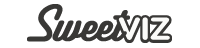
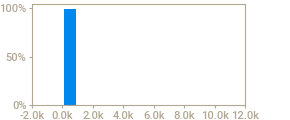
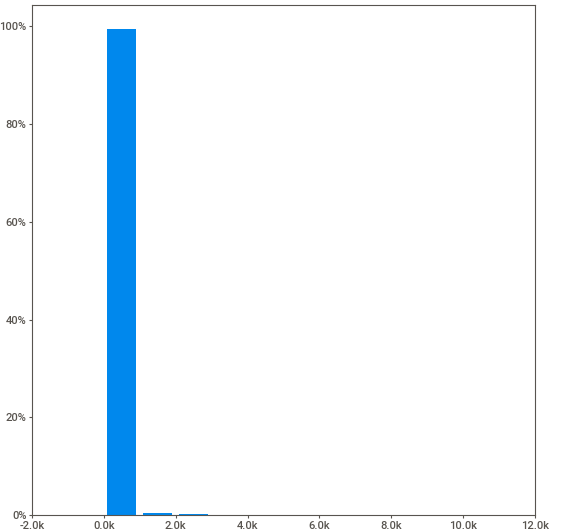
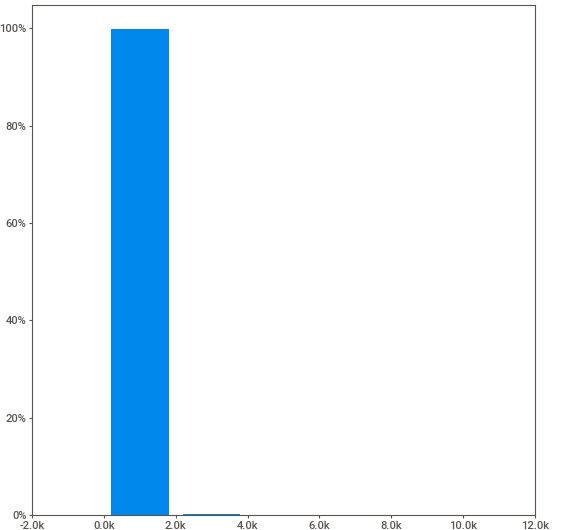
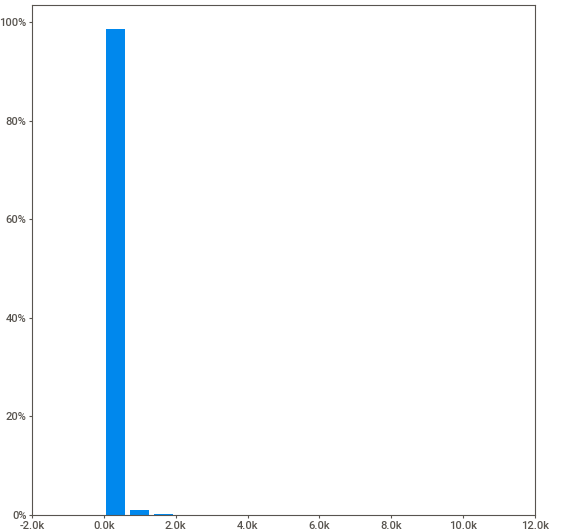
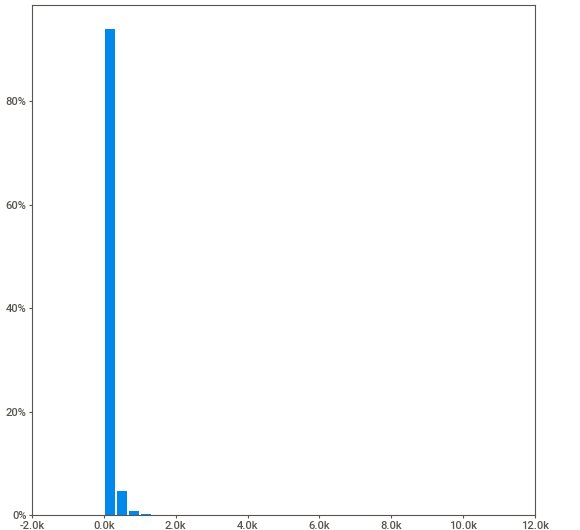
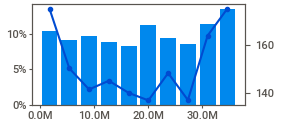
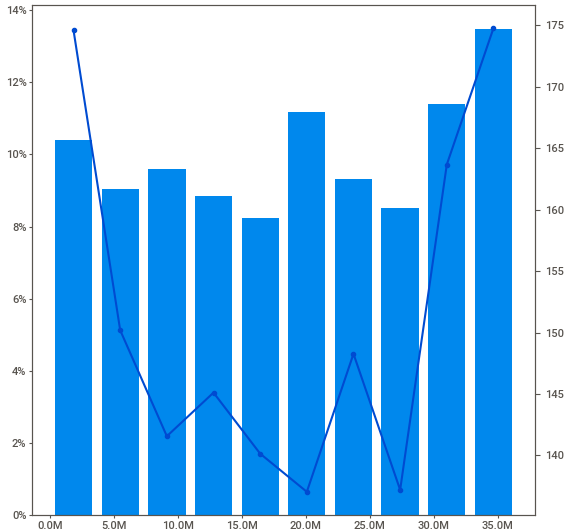
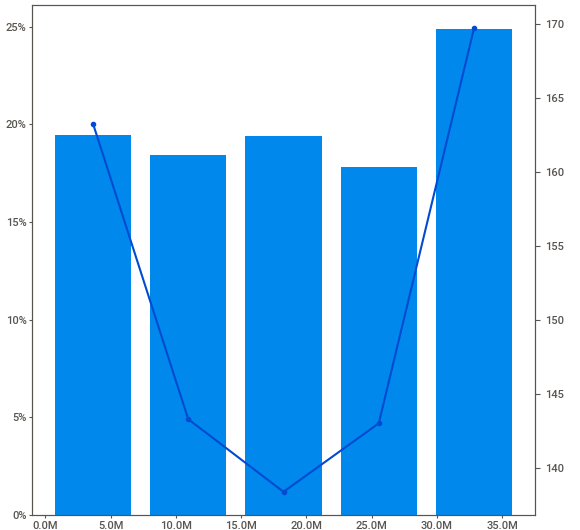
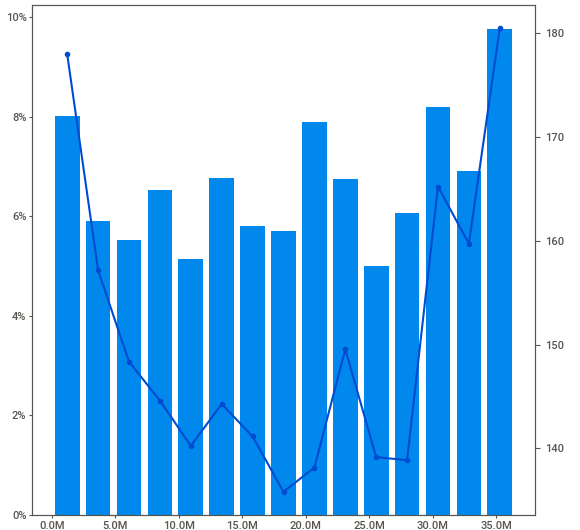
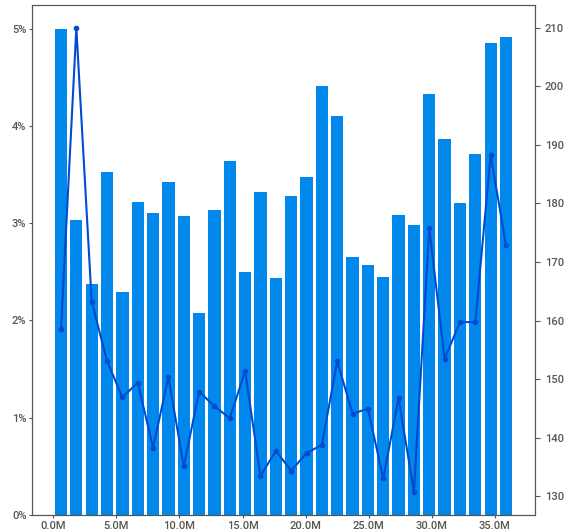
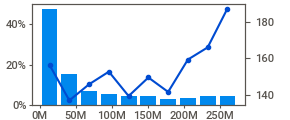
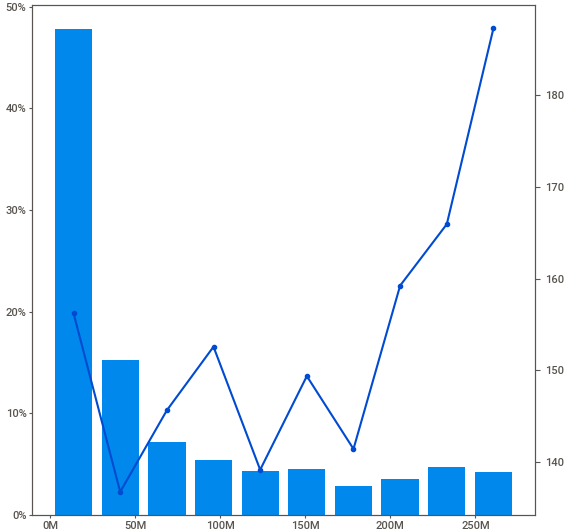
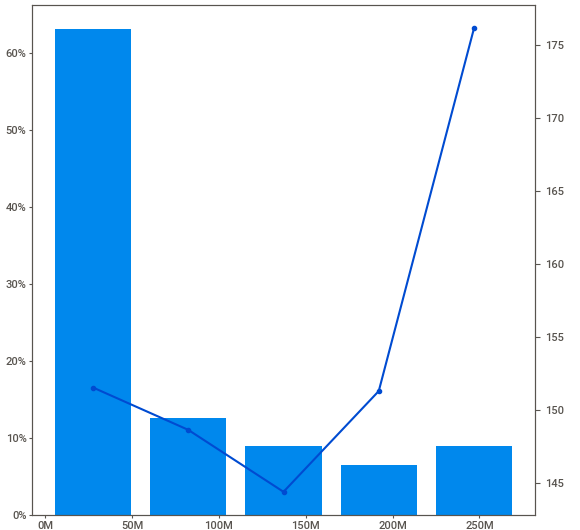
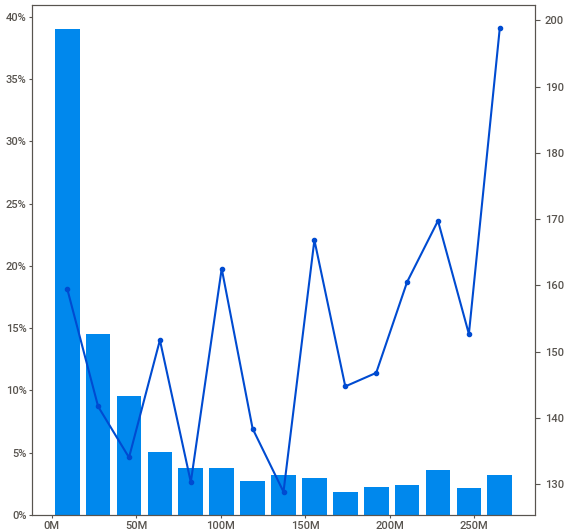
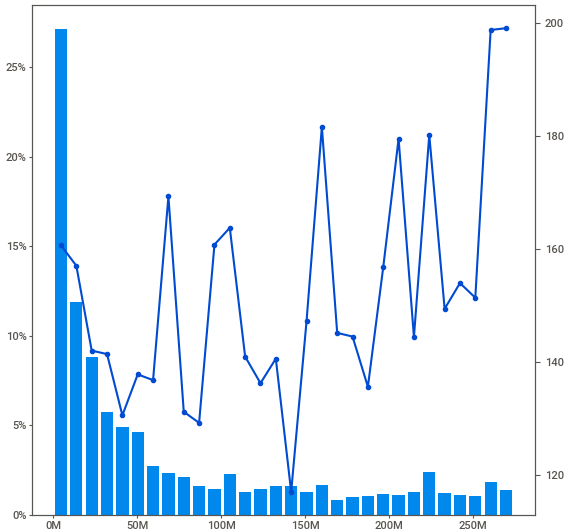
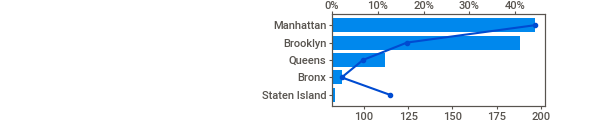
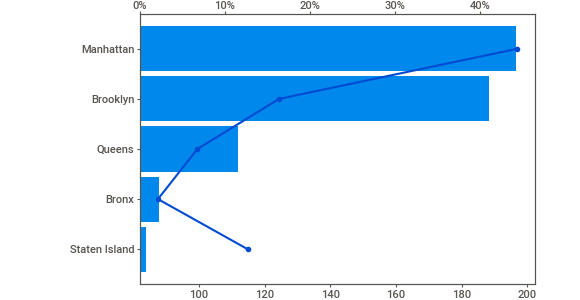
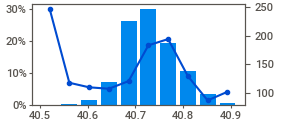
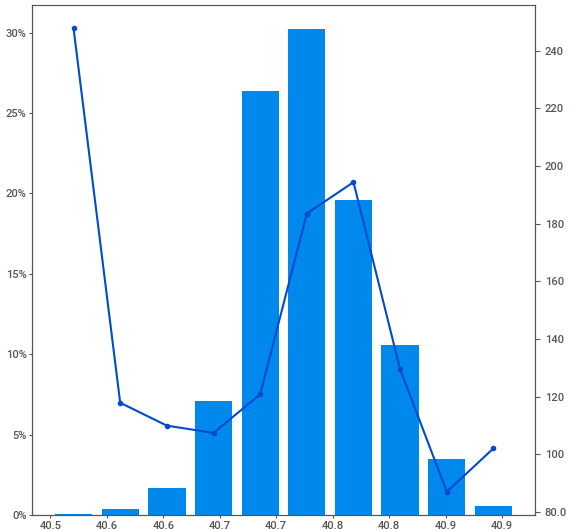
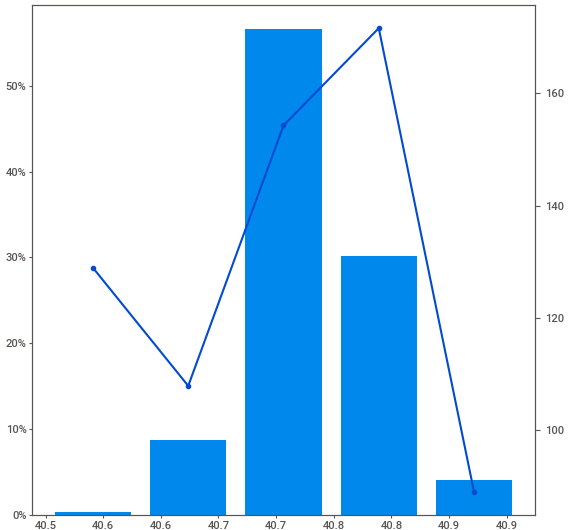
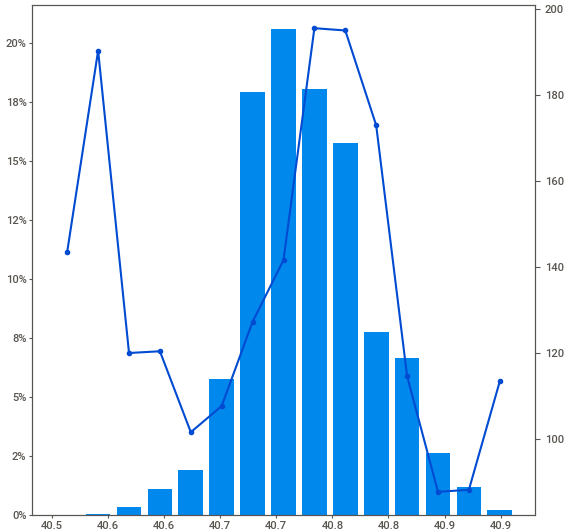
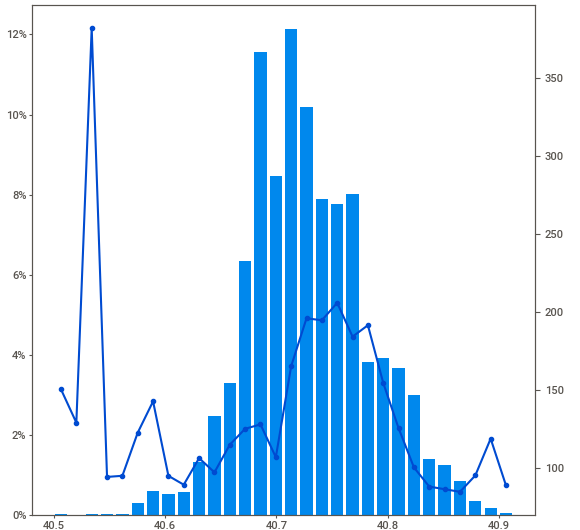
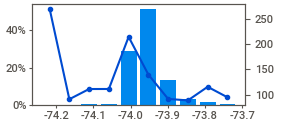
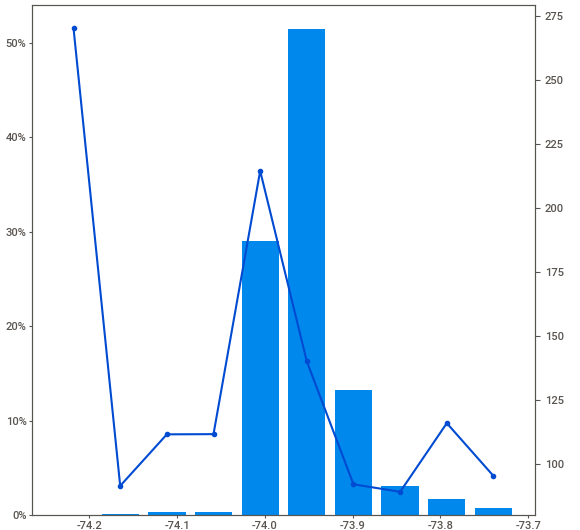
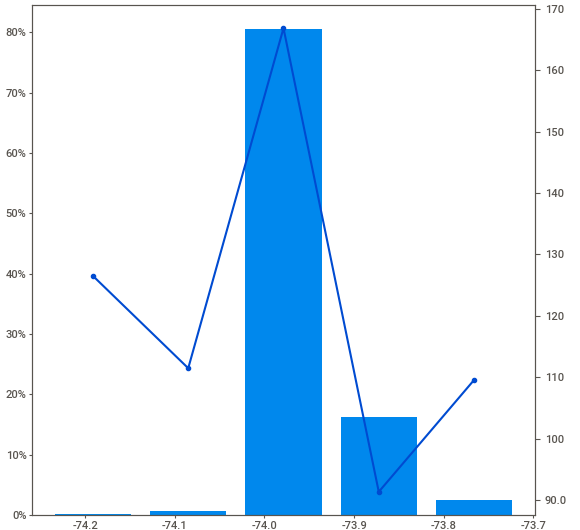
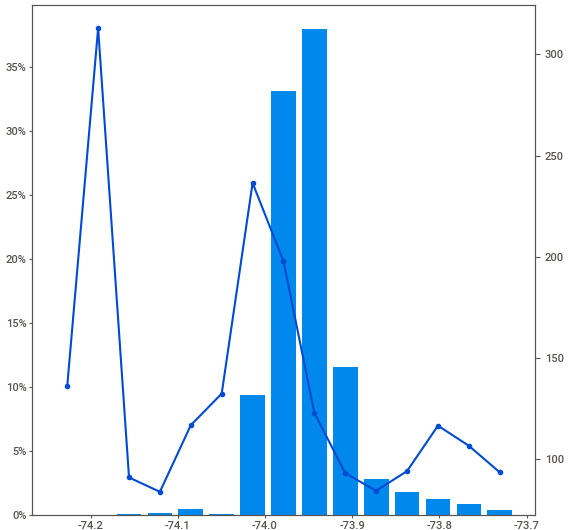
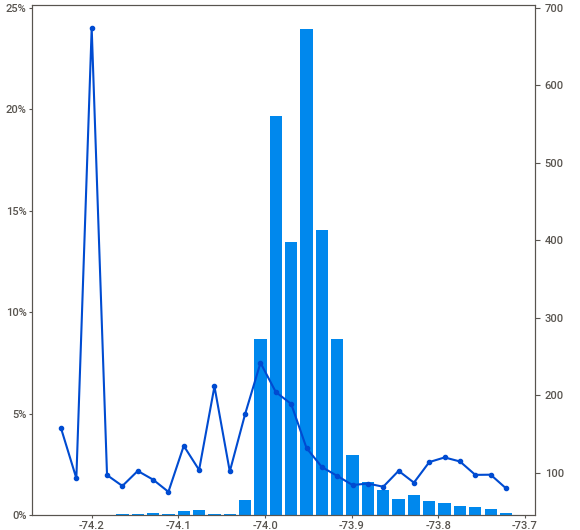
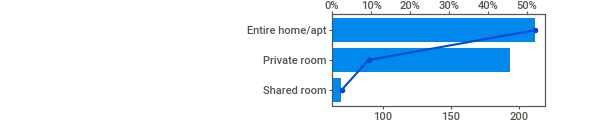
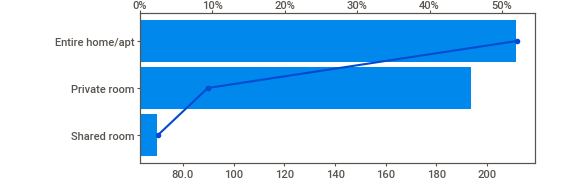
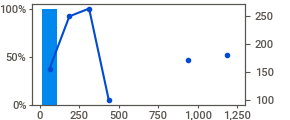
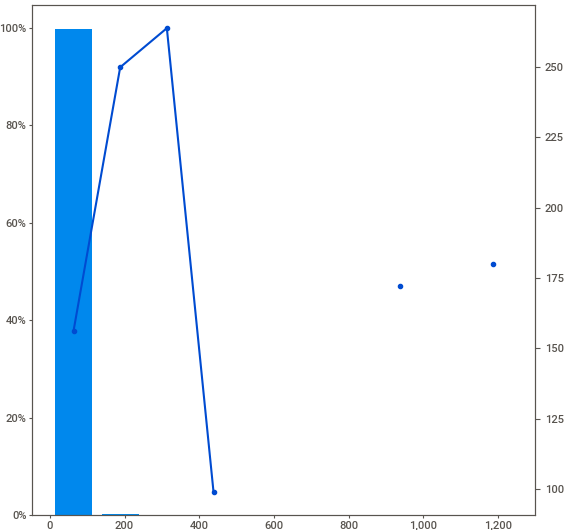
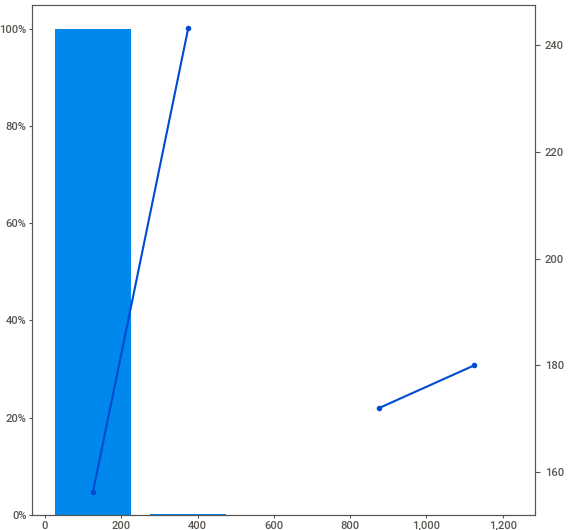
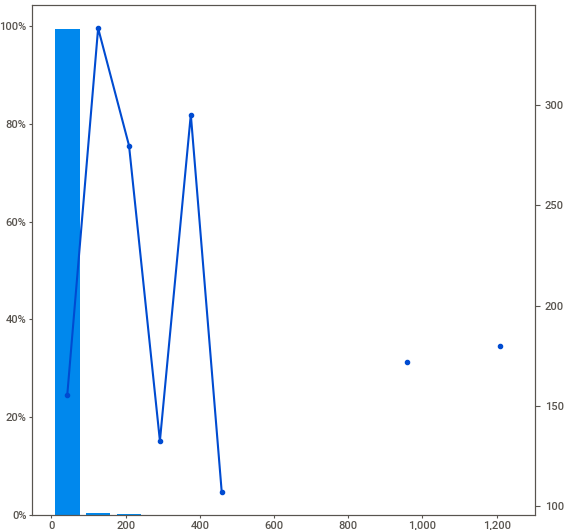
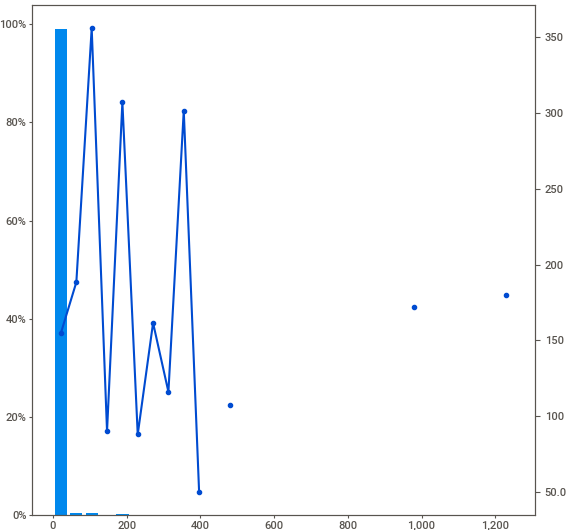
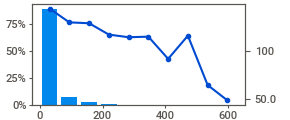
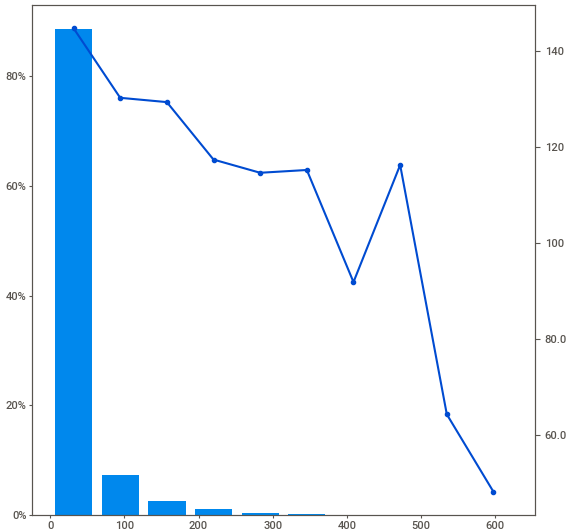
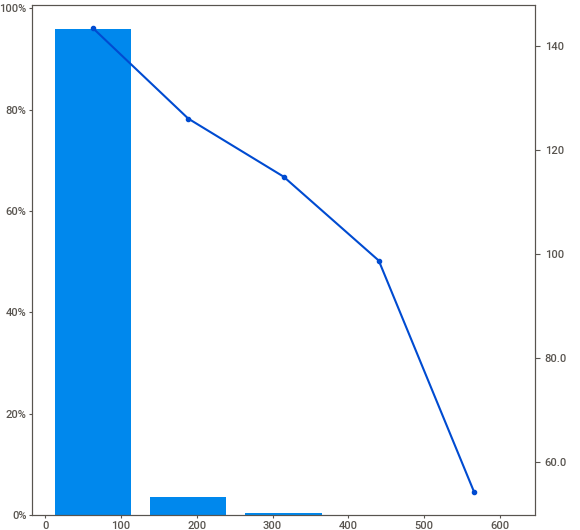
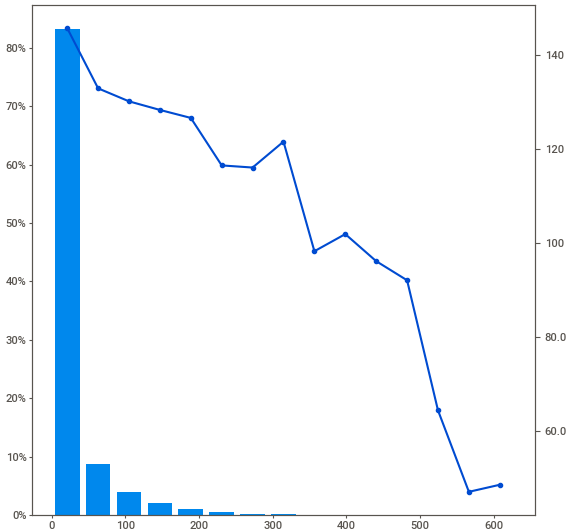
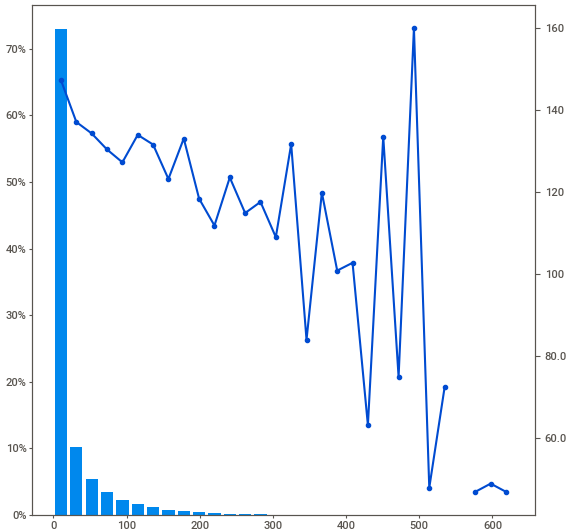
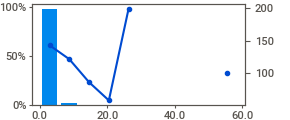
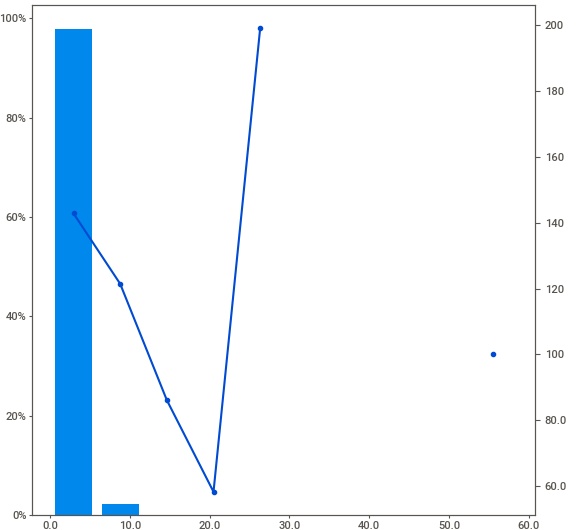
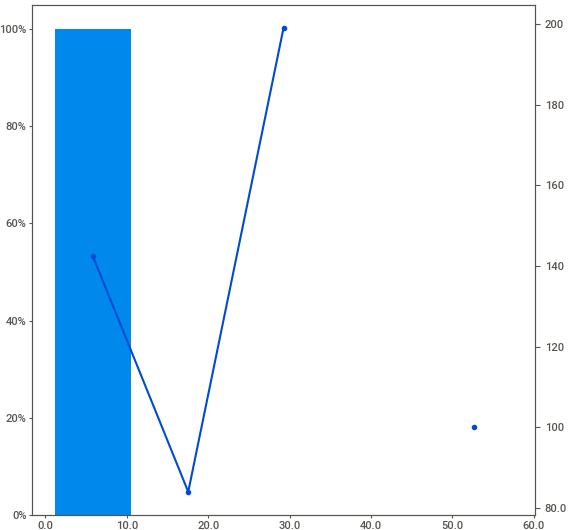
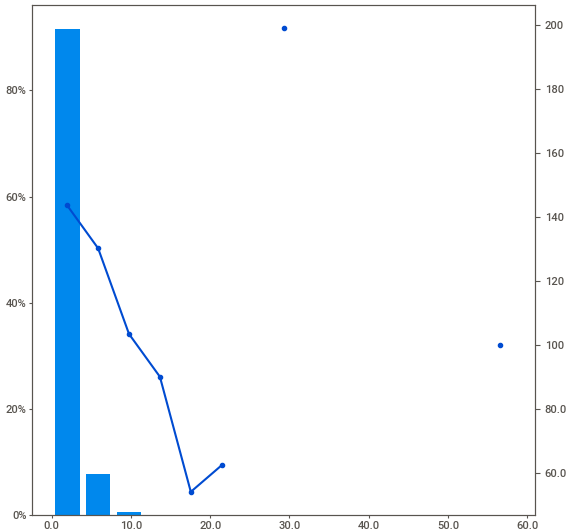
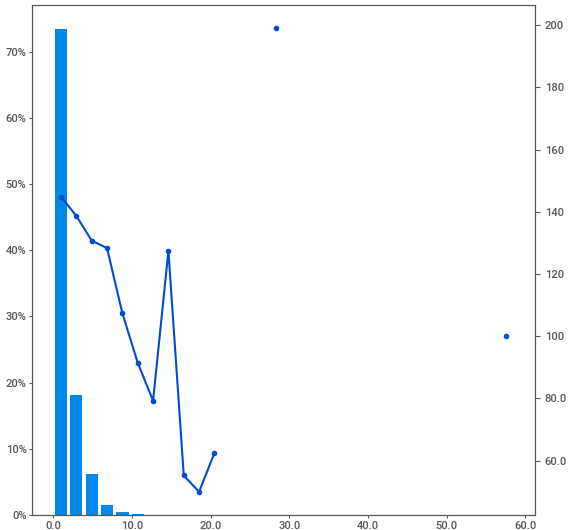
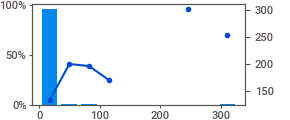
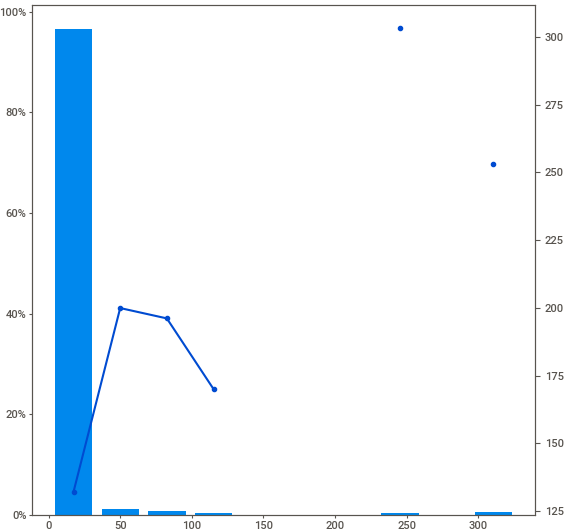
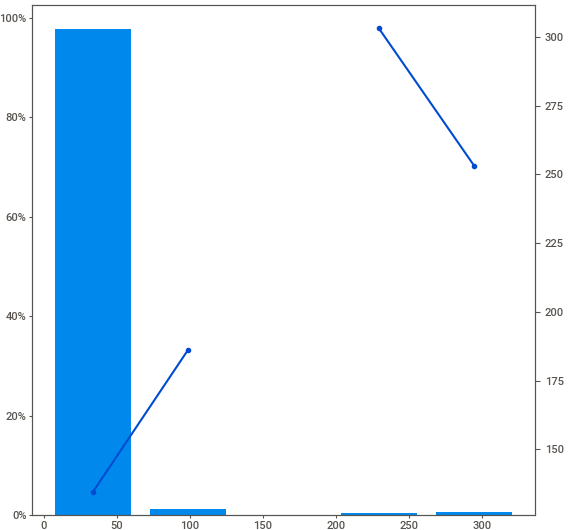
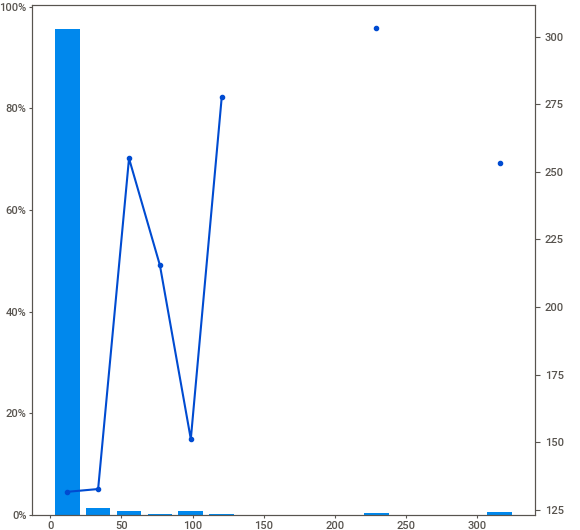
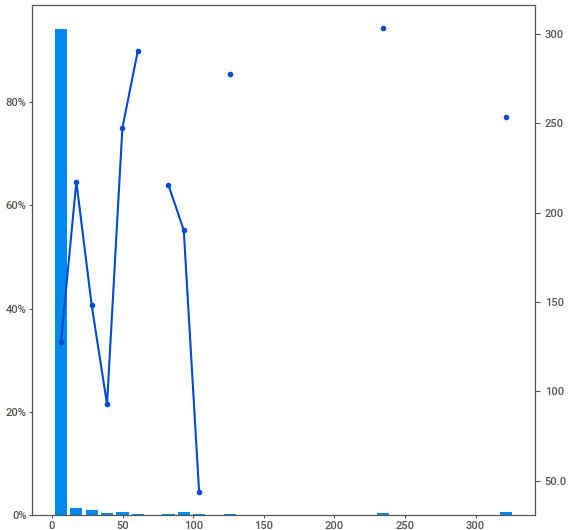
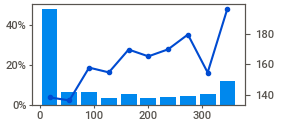
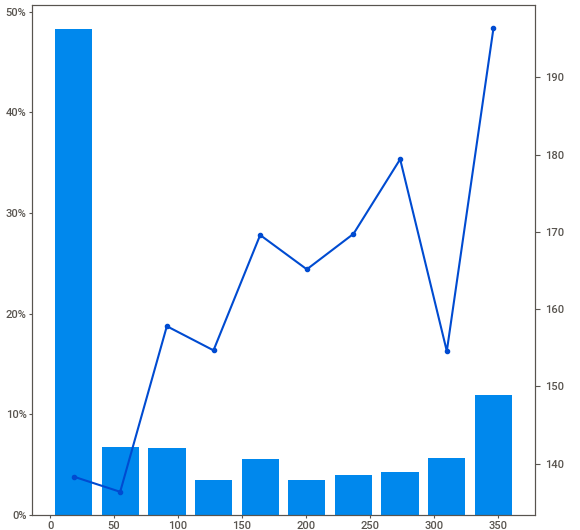
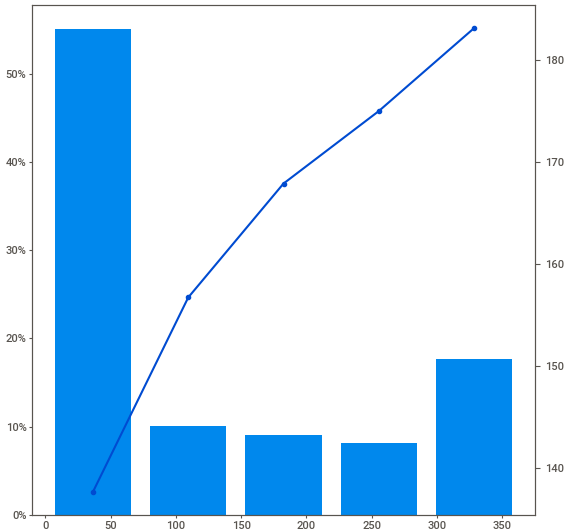
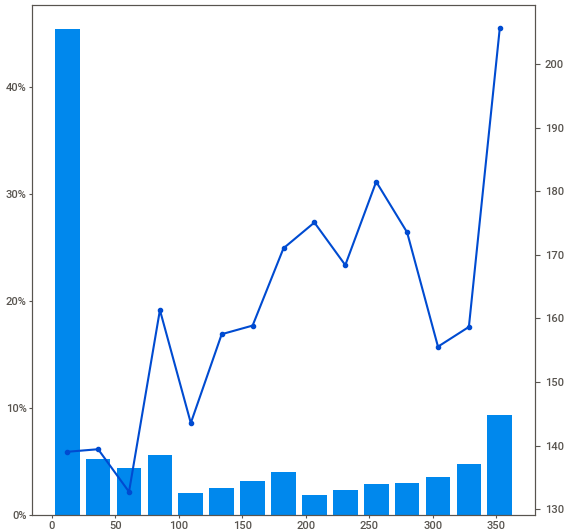
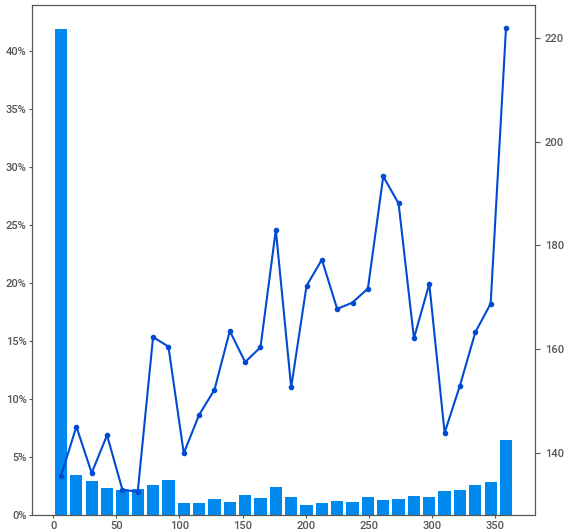
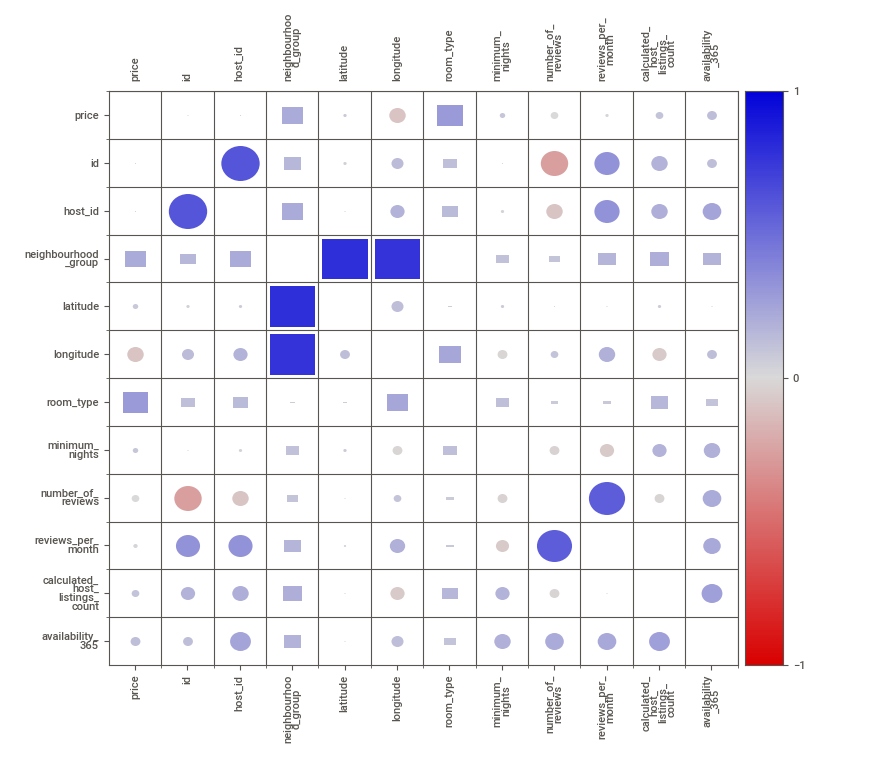
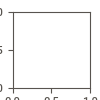

In [11]:
from IPython.display import HTML

with open('/content/SWEETVIZ_REPORT.html', 'r') as f:
    html_string = f.read()

HTML(html_string)

### **The report is accessible through the following link** : 
https://akshayshastri.github.io/AirbnbNY-EDA-report/SWEETVIZ_REPORT.html

##Visualization of the data by the neighbourhood

In [12]:
import seaborn as sns

In [13]:
df2=pd.DataFrame(df['neighbourhood'].value_counts()).reset_index().rename(columns={'index': 'neighbourhood','neighbourhood':'count'})
df2

,neighbourhood,count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
...,...,...
216,Fort Wadsworth,1
217,Richmondtown,1
218,New Dorp,1
219,Rossville,1


In [14]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots


In [15]:
##Map visualization
fig = px.scatter(df, x='longitude', y='latitude',
                 color='neighbourhood_group') # Added color to previous basic 
fig.update_layout(xaxis_title="longitude",yaxis_title="latitude")
fig.show()